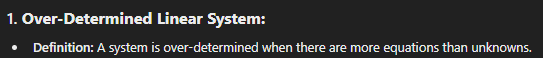

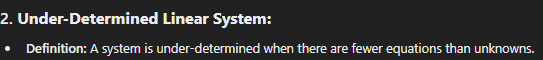
# ________________________________________________________________________________________________
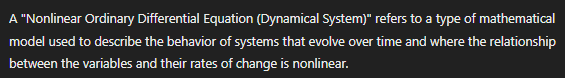

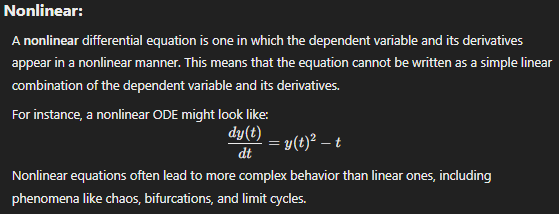
# _______________________________________________________________________________________________
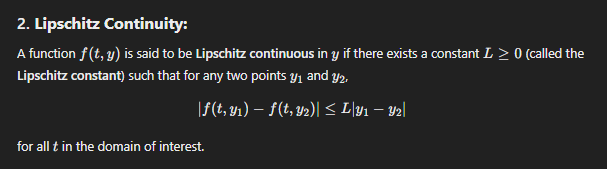
# _______________________________________________________________________________________________
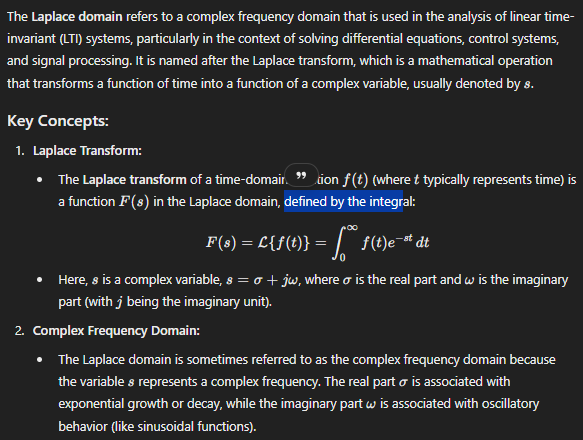

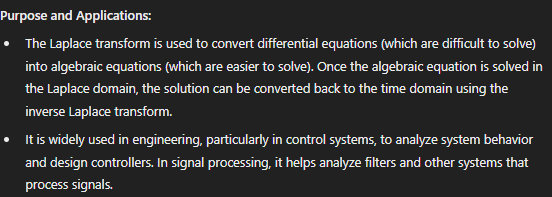
# _______________________________________________________________________________________________
# SVD

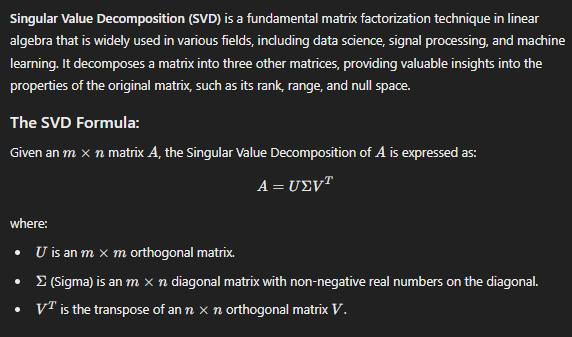

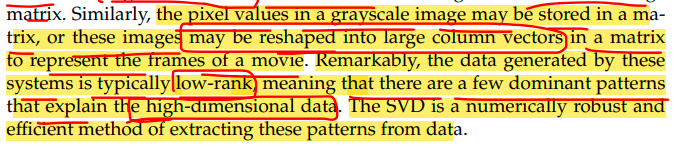

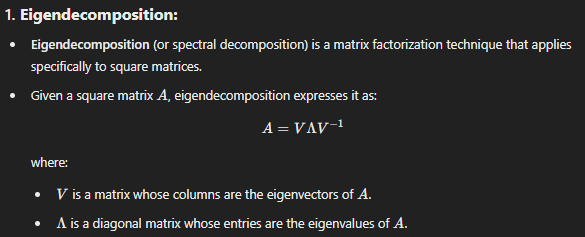

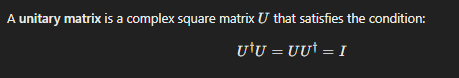

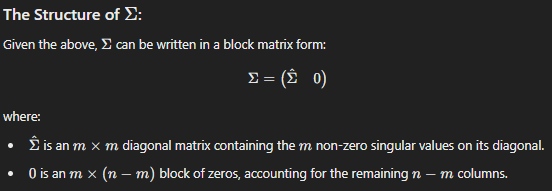

In [1]:
import numpy as np
X = np.random.rand(5, 3) # Create random data matrix
U, S, VT = np.linalg.svd(X,full_matrices=True) #Full SVD
Uhat, Shat, VThat = np.linalg.svd(X,full_matrices=False)

In [11]:
# here X is of shape 5, 3 so U will be => 5 * 5 
# but Σ should be min(5,3) => 3
# so IN U -> Uhat will be [5,3] and uhat will be of [5, 2] 
# here rank is 3 which mean min 3 dim is required that can explaim high dimentional data
# and rest 2 are not important though they contain important info
X

array([[0.43901537, 0.78325477, 0.58082555],
       [0.73403194, 0.79787577, 0.95799872],
       [0.29654237, 0.87428649, 0.04175535],
       [0.52536911, 0.45413192, 0.95923346],
       [0.22177274, 0.71652061, 0.03633095]])

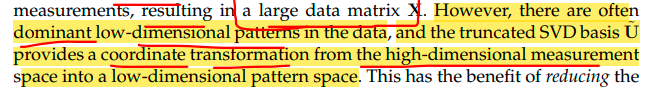

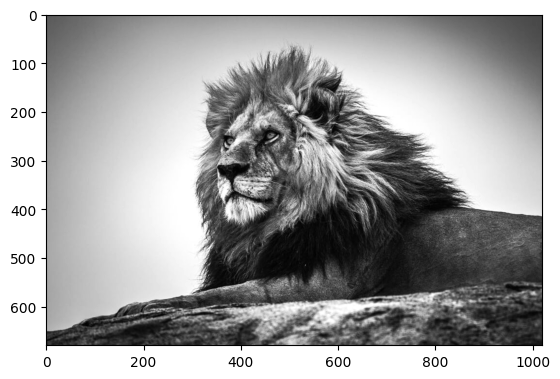

In [16]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
A = imread("lion.jpg")
X = np.mean(A, -1); # Convert RGB to grayscale
img = plt.imshow(X,cmap='gray')

In [17]:
# Take the SVD
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

In [28]:
VT.shape

(680, 1020)

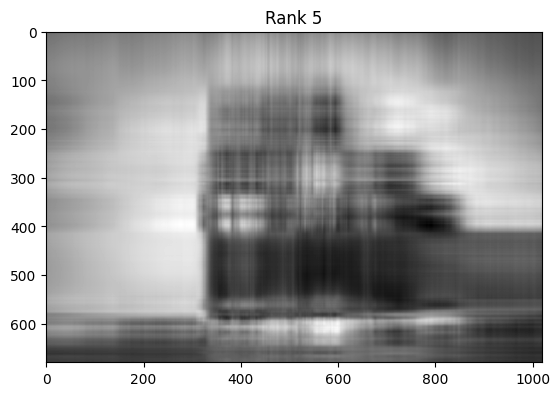

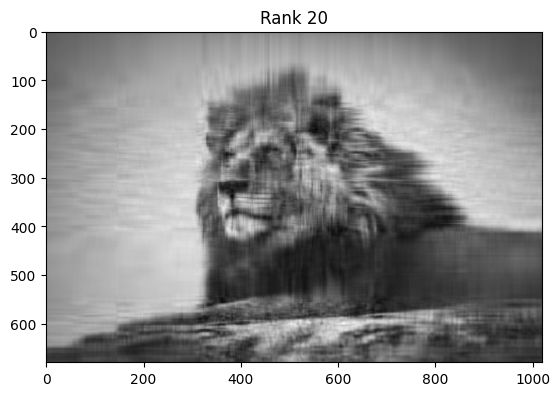

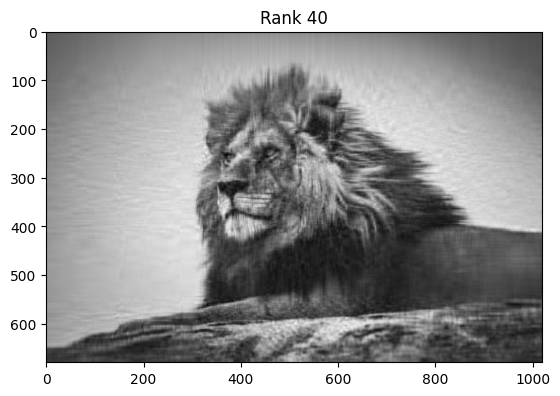

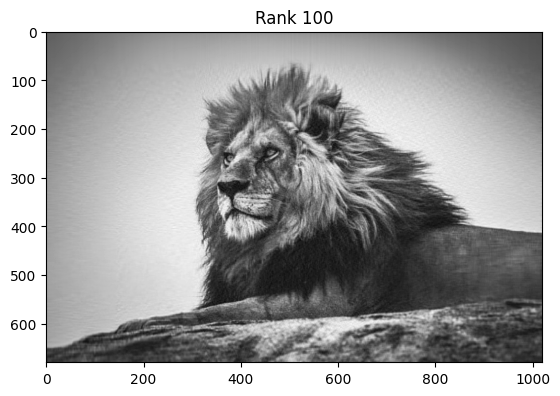

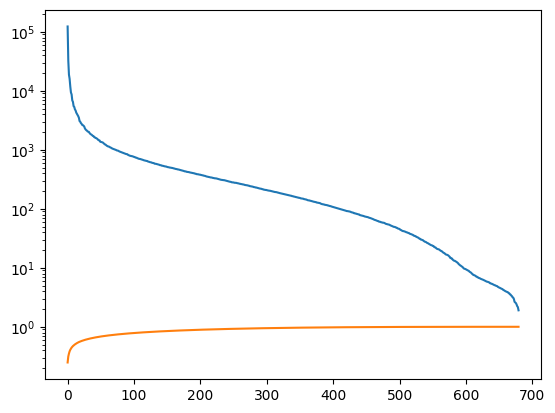

In [30]:
for r in (5, 20, 40, 100): # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    img = plt.imshow(Xapprox,cmap='gray')
    plt.title(f"Rank {r}")
    plt.show()

plt.semilogy(np.diag(S))
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))

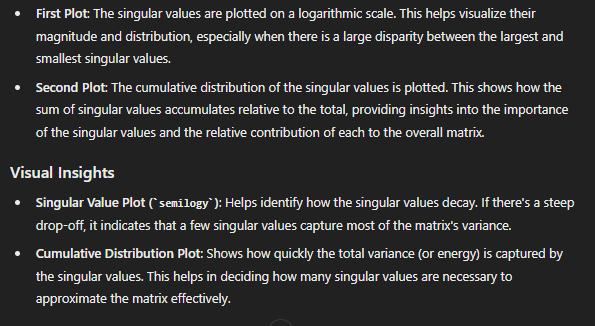

'''
    you have a matrix X 
    e.g =>  5 x 3

    now to decompose this in order to reduce dimension
    
    create a U = 5 x 5 matrix, and a V =  3 x 3 matrix

    such that U captures the example domain

    and v captures the feature domain such that 

    U Σ V will give exact X ,
    
    so its like from generalized feature matrics and the generalized example matrics by exact Σ values you get the X

    where Σ = 5 x 3 

'''

In [34]:
A = np.random.rand(3, 2)
B = np.random.rand(2, 3)

In [39]:
(A.dot(B)).T ==B.T.dot(A.T)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

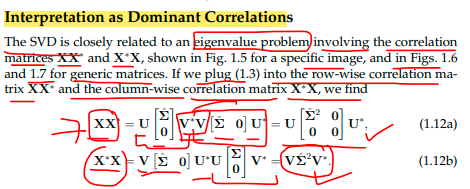

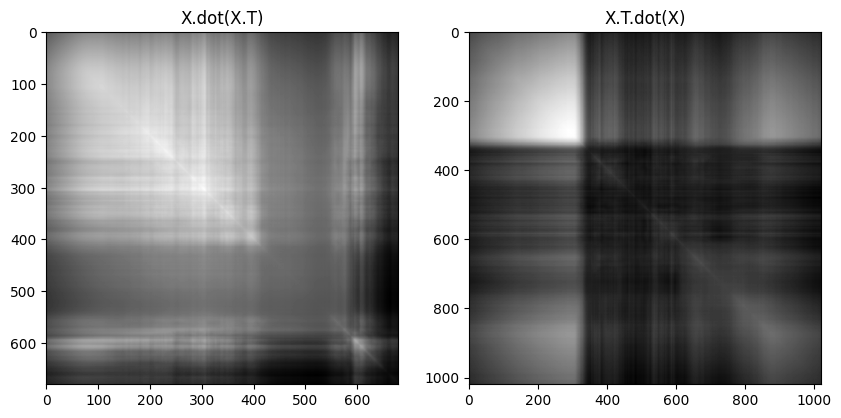

In [47]:
xxt = X.dot(X.T)
xtx = X.T.dot(X)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(xxt, cmap="gray")
axes[0].set_title("X.dot(X.T)")

axes[1].imshow(xtx, cmap="gray")
axes[1].set_title("X.T.dot(X)")

plt.show()

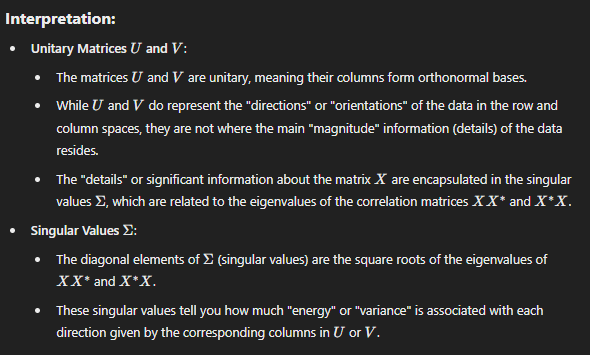

'''

so XXT accourding to formula is U Σ2 U*  eq.1

and XTX according to our formula is V Σ2 V*  eq.2

so when we do XXT we just check row_i correlation with row_j and according to eq.1 it should be equal to U Σ2 U*, normaly row are diff data , so U suppose to capture the direction in data 

same goes for eq.2 it should cover features

but for pertucilar one metrics Σ are what actually decides the information

'''

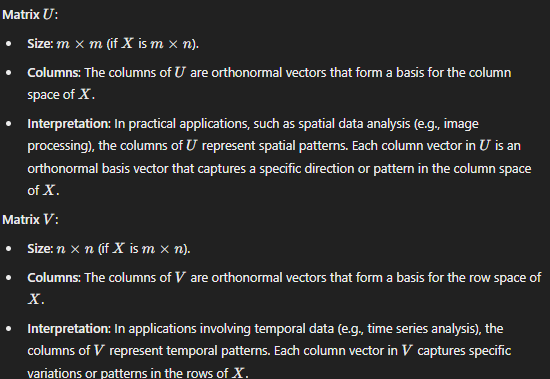

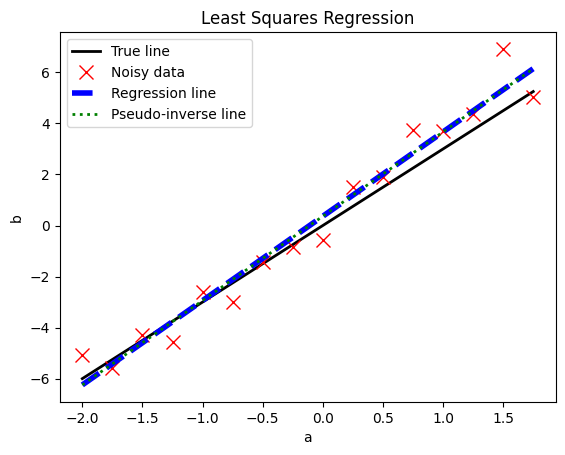

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
x = 3  # True slope
a = np.arange(-2, 2, 0.25)
a = a.reshape(-1, 1)
b = x * a + np.random.randn(*a.shape)  # Add noise

# Plot true line and noisy data
plt.plot(a, x * a, color='k', linewidth=2, label='True line')
plt.plot(a, b, 'x', color='r', markersize=10, label='Noisy data')

# Compute least-squares approximation with the SVD
A = np.hstack([a, np.ones_like(a)])  # Design matrix with intercept term
U, S, VT = np.linalg.svd(A, full_matrices=False)
S_inv = np.diag(1 / S)
xtilde = VT.T @ S_inv @ U.T @ b

# Plot regression line
plt.plot(a, xtilde[0] * a + xtilde[1], '--', color='b', linewidth=4, label='Regression line')

# Alternative formulations of least squares
xtilde1 = np.linalg.pinv(A) @ b
plt.plot(a, xtilde1[0] * a + xtilde1[1], ':', color='g', linewidth=2, label='Pseudo-inverse line')

# Show plot with legend
plt.legend()
plt.xlabel('a')
plt.ylabel('b')
plt.title('Least Squares Regression')
plt.show()


# PCA

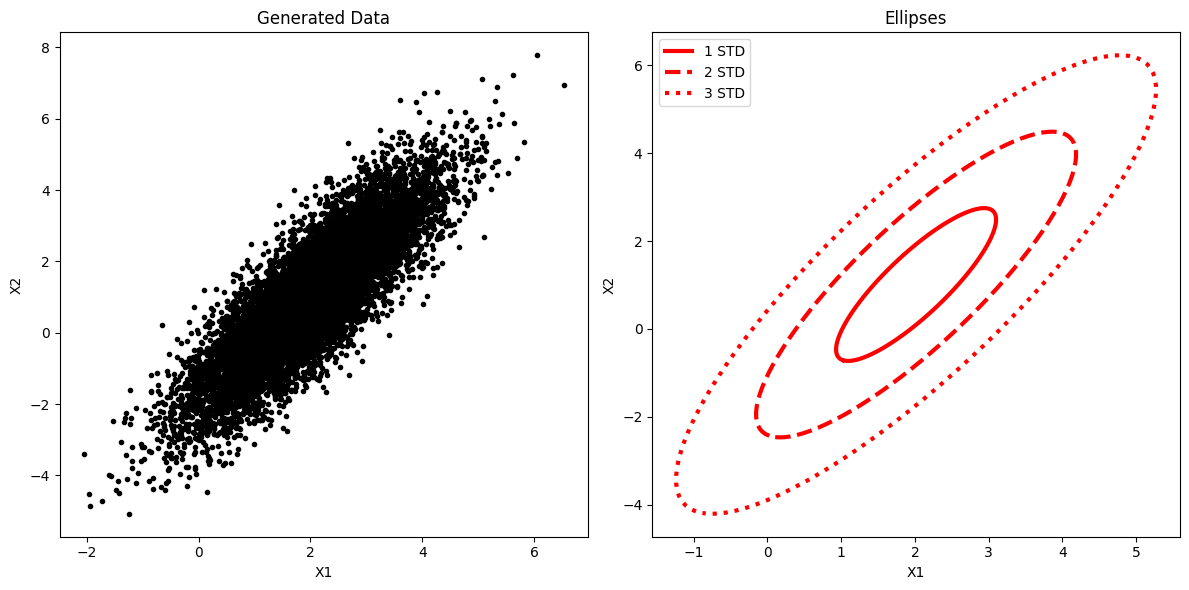

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
xC = np.array([2, 1])  # Center of data (mean)
sig = np.array([2, 0.5])  # Principal axes
theta = np.pi / 3  # Rotate cloud by pi/3
R = np.array([[np.cos(theta), -np.sin(theta)],  # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000  # Number of points to create

# Generate random points and transform them
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + xC.reshape(-1, 1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot data
ax1.plot(X[0, :], X[1, :], '.', color='k')
ax1.set_title('Generated Data')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')

# Compute mean
Xavg = np.mean(X, axis=1)

# Mean-subtracted data
B = X - Xavg.reshape(-1, 1)

# Perform SVD
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)

# Generate ellipse based on SVD results
theta_vals = 2 * np.pi * np.arange(0, 1, 0.01)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta_vals), np.sin(theta_vals)])

# Plot ellipses
ax2.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], '-', color='r', linewidth=3, label='1 STD')
ax2.plot(Xavg[0] + 2 * Xstd[0, :], Xavg[1] + 2 * Xstd[1, :], '--', color='r', linewidth=3, label='2 STD')
ax2.plot(Xavg[0] + 3 * Xstd[0, :], Xavg[1] + 3 * Xstd[1, :], ':', color='r', linewidth=3, label='3 STD')

ax2.set_title('Ellipses')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.legend()

# Show plots
plt.tight_layout()
plt.show()


# EigenFaces

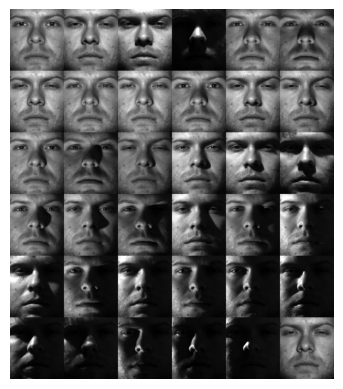

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Path to the directory containing the .png images
image_folder = './archive/CroppedYalePNG/'

# List all .png files in the directory
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])

# Assuming all images have the same size, load the first image to get dimensions
sample_image = Image.open(os.path.join(image_folder, image_files[0]))
m, n = sample_image.size

# Initialize the array to store all persons' faces
allPersons = np.zeros((n * 6, m * 6))

count = 0

# Loop through to arrange the faces into a grid
for j in range(6):
    for k in range(6):
        # Load the image, convert to grayscale, and convert to numpy array
        img = Image.open(os.path.join(image_folder, image_files[count])).convert('L')
        img_array = np.array(img)
        
        # Place the image in the appropriate position in the grid
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = img_array
        count += 1

# Display the image grid
plt.imshow(allPersons, cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()


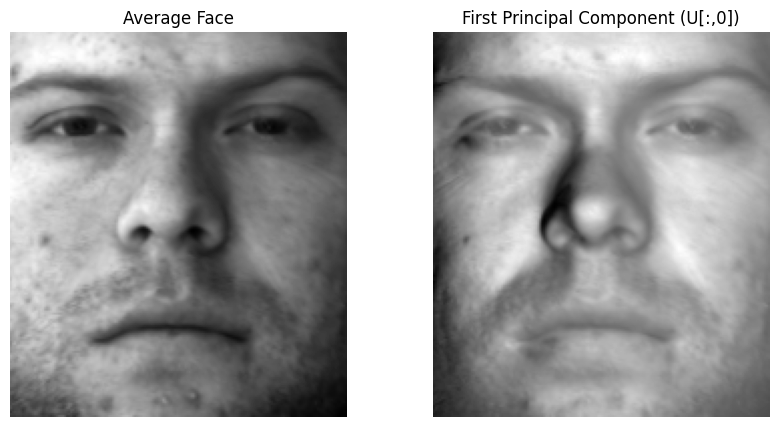

In [3]:
training_images = image_files[:36]

faces = []
for image_file in training_images:
    img = Image.open(os.path.join(image_folder, image_file)).convert('L')
    img_array = np.array(img).flatten()
    faces.append(img_array)

faces = np.array(faces).T  

avgFace = np.mean(faces, axis=1)  

X = faces - avgFace[:, np.newaxis]

U, S, VT = np.linalg.svd(X, full_matrices=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

img_avg = ax1.imshow(np.reshape(avgFace, (img.size[1], img.size[0])), cmap='gray')
ax1.set_title("Average Face")
ax1.axis('off')  

img_u1 = ax2.imshow(np.reshape(U[:, 0], (img.size[1], img.size[0])), cmap='gray')
ax2.set_title("First Principal Component (U[:,0])")
ax2.axis('off')  

plt.show()

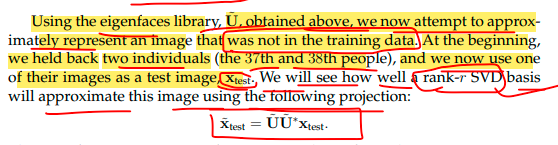

Text(0.5, 1.0, 'Orignal')

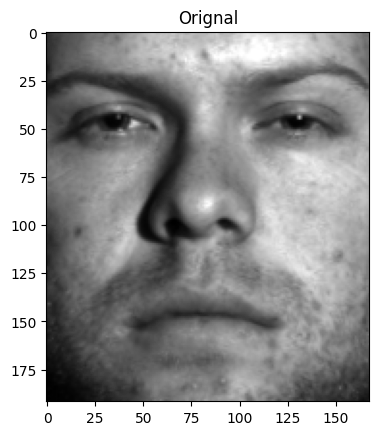

In [12]:
test_image_file = image_files[40]
test_img = Image.open(os.path.join(image_folder, test_image_file)).convert('L')
testFace = np.array(test_img).flatten()
plt.imshow(test_img,cmap='gray')
plt.title("Orignal")


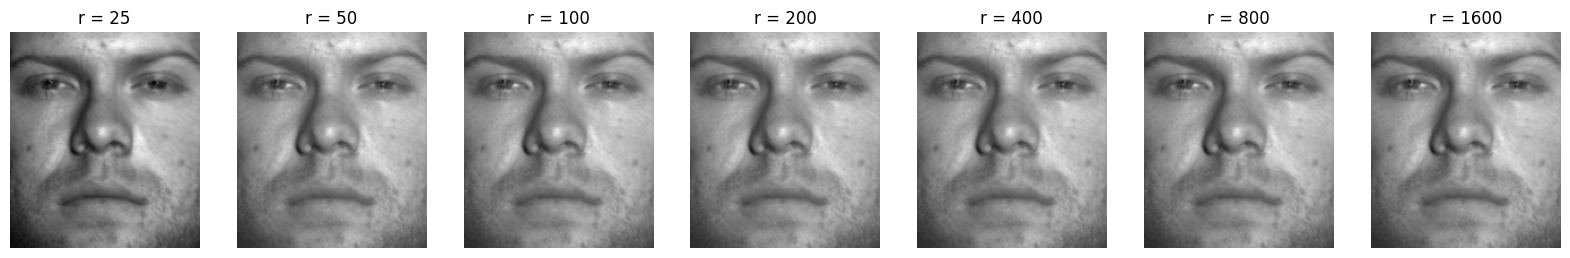

In [14]:
# Mean subtraction for the test face
testFaceMS = testFace - avgFace

# Reconstruct the test face using different numbers of principal components
r_list = [25, 50, 100, 200, 400, 800, 1600]
fig, axes = plt.subplots(1, len(r_list), figsize=(20, 5))

for i, r in enumerate(r_list):
    # Reconstruct the test face
    reconFace = avgFace + U[:, :r] @ U[:, :r].T @ testFaceMS

    ax = axes[i]
    ax.imshow(np.reshape(reconFace, (test_img.size[1], test_img.size[0])), cmap='gray')
    ax.set_title(f'r = {r}')
    ax.axis('off')  

plt.show()

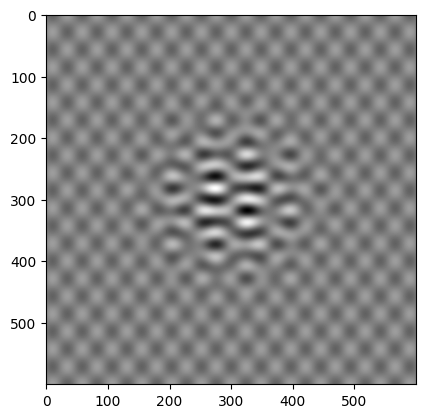

In [32]:
t = np.arange(-3,3,0.01)
Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T
X = Utrue @ Strue @ Vtrue.T
plt.imshow(X,cmap="gray")


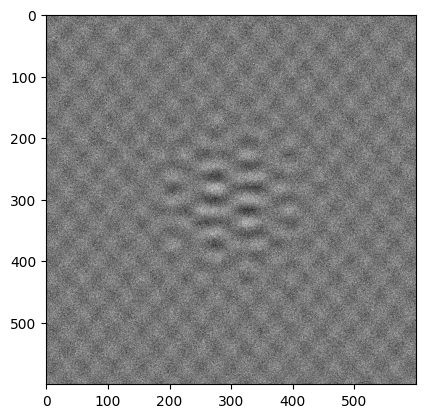

In [30]:
# Contaminate signal with noise
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)
plt.imshow(Xnoisy,cmap="gray")

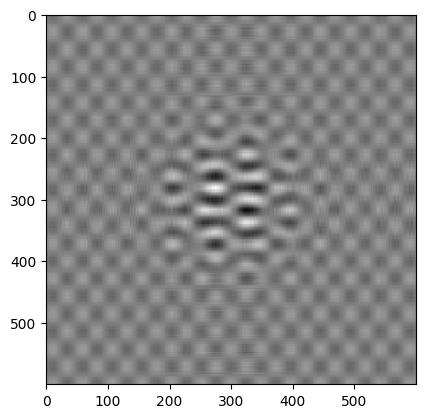

In [47]:
# Truncate using optimal hard threshold
U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma #Hard threshold  (4 / root(3)) * root(N)
r = np.max(np.where(S > cutoff))  # Keep modes w/ S > cutoff
Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]
plt.imshow(Xclean,cmap="gray")

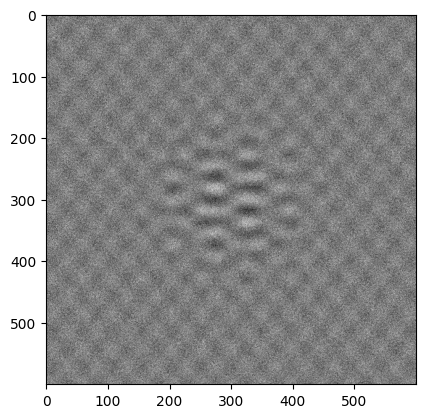

In [53]:
# Truncate to keep 90% of cumulative sum
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > .9)) # Find r to keep 90% sum
X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
plt.imshow(X90,cmap="gray")

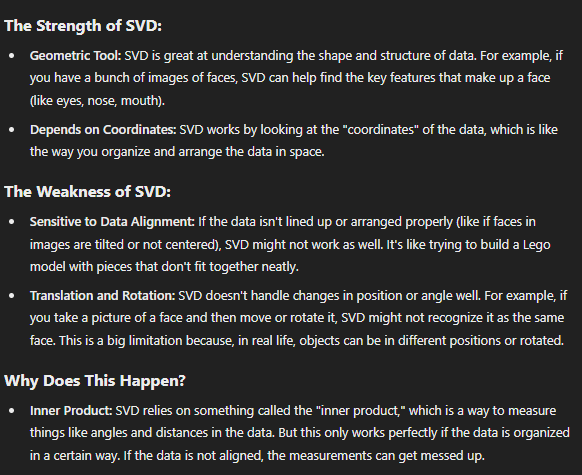

In [83]:
import numpy as np
from scipy.linalg import svd
from matplotlib.image import imread
import os

def rSVD(X, r, q, p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny, r + p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)
    Q, R = np.linalg.qr(Z, mode='reduced')
    
    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y, full_matrices=False)
    U = Q @ UY
    return U, S, VT

# Load the image and convert to grayscale
A = imread('old.jpg')
X = np.mean(A, axis=2)  # Convert RGB -> grayscale

# Full SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Parameters for randomized SVD
r = 30  # Target rank
q = 1    # Power iterations
p = 5    # Oversampling parameter

# Randomized SVD
rU, rS, rVT = rSVD(X, r, q, p)

# Reconstruction using full SVD
XSVD = U[:, :r+1] @ np.diag(S[:r+1]) @ VT[:r+1, :]
errSVD = np.linalg.norm(X - XSVD, ord=2) / np.linalg.norm(X, ord=2)

# Reconstruction using randomized SVD
XrSVD = rU[:, :r+1] @ np.diag(rS[:r+1]) @ rVT[:r+1, :]
errrSVD = np.linalg.norm(X - XrSVD, ord=2) / np.linalg.norm(X, ord=2)

# Output the errors
print(f"Error using full SVD: {errSVD}")
print(f"Error using randomized SVD: {errrSVD}")


Error using full SVD: 0.020463022326563707
Error using randomized SVD: 0.023576139628880596


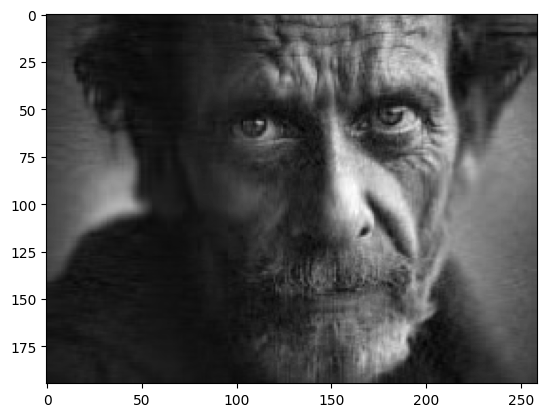

In [84]:
plt.imshow(XSVD,cmap="gray")

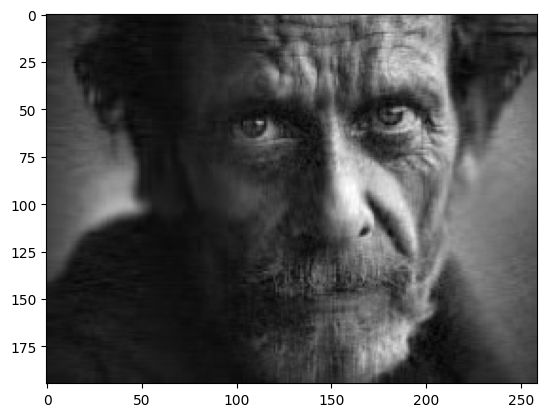

In [85]:
plt.imshow(XrSVD,cmap="gray")